In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reviews/mobile_data_with_reviews_and_ratinl.csv
/kaggle/input/mobiledataa/cleaned_data.csv
/kaggle/input/mobiledataa/mobile_data.csv


In [3]:
import pandas as pd
data = pd.read_csv('/kaggle/input/mobiledataa/mobile_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Phone        984 non-null    object
 1   Price        984 non-null    object
 2   Mobile Link  984 non-null    object
 3   Brand        984 non-null    object
 4   Color        984 non-null    object
 5   Storage      984 non-null    object
 6   Image URL    984 non-null    object
dtypes: object(7)
memory usage: 53.9+ KB


In [4]:
import pandas as pd

# Load the cleaned DataFrame
df = pd.read_csv('/kaggle/input/mobiledataa/cleaned_data.csv')

def recommend_mobile(df):
    # Get user input for price range
    min_price = float(input("Enter minimum price: "))
    max_price = float(input("Enter maximum price: "))
    price_range = (min_price, max_price)

    # Get user input for brand
    brand = input("Enter brand: ")

    # Get user input for storage
    storage = int(input("Enter storage (in GB): "))

    # Filter the DataFrame based on the user inputs
    filtered_df = df[(df['Price'] >= min_price) & (df['Price'] <= max_price) &
                     (df['Brand'] == brand) & (df['Storage'] == storage)]

    # Rank the filtered DataFrame based on price
    ranked_df = filtered_df.sort_values(by='Price', ascending=True)

    if ranked_df.empty:
        return "No mobiles found matching the criteria."

    # Get the top recommendation
    top_recommendation = ranked_df.iloc[0]

    # Extract relevant information
    recommendation_info = {
        'Phone': top_recommendation['Phone'],
        'Price': top_recommendation['Price'],
        'Mobile Link': top_recommendation['Mobile Link'],
        'Image URL': top_recommendation['Image URL']
    }

    return recommendation_info

# Get recommendation based on user input
recommendation = recommend_mobile(df)
if isinstance(recommendation, str):
    print(recommendation)
else:
    print("Top Recommendation:")
    print(recommendation)


Enter minimum price:  10000
Enter maximum price:  50000
Enter brand:  SAMSUNG
Enter storage (in GB):  128


Top Recommendation:
{'Phone': 'SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)', 'Price': 10490.0, 'Mobile Link': 'https://www.flipkart.com/samsung-galaxy-f14-5g-omg-black-128-gb/p/itmae94033406fb2?pid=MOBGNBFNE6KGXCCR&lid=LSTMOBGNBFNE6KGXCCRXLTXS7&marketplace=FLIPKART&store=tyy%2F4io&srno=b_41_981&otracker=browse&fm=organic&iid=en_jEQiyboymZRG7v2ubBDXeup-76ls7pL1K_58-13Um7mTToG6ZnxNG8QH61HcJMKMOZgKUa-IyZAPz9dToTfrjPUFjCTyOHoHZs-Z5_PS_w0%3D&ppt=None&ppn=None&ssid=7ttm95fzio0000001713048505595', 'Image URL': 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/r/8/k/-original-imagtyxcgmgvtm7y.jpeg?q=70'}


In [5]:
# case -insesitive
import pandas as pd
from PIL import Image
from IPython.display import display

# Load the cleaned DataFrame
df = pd.read_csv('/kaggle/input/mobiledataa/cleaned_data.csv')

def recommend_mobile(df):
    # Get user input for price range
    min_price = float(input("Enter minimum price: "))
    max_price = float(input("Enter maximum price: "))
    price_range = (min_price, max_price)

    # Get user input for brand
    brand = input("Enter brand: ").lower()  # Convert input to lowercase

    # Get user input for storage
    storage = int(input("Enter storage (in GB): "))

    # Convert brand column in DataFrame to lowercase
    df['Brand'] = df['Brand'].str.lower()

    # Filter the DataFrame based on the user inputs
    filtered_df = df[(df['Price'] >= min_price) & (df['Price'] <= max_price) &
                     (df['Brand'] == brand) & (df['Storage'] == storage)]

    # Rank the filtered DataFrame based on price
    ranked_df = filtered_df.sort_values(by='Price', ascending=True)

    if ranked_df.empty:
        return "No mobiles found matching the criteria."

    # Get the top recommendation
    top_recommendation = ranked_df.iloc[0]

    # Display recommendation details
    print("\nTop Recommendation:")
    print("Phone:", top_recommendation['Phone'])
    print("Price: ₹{:.2f}".format(top_recommendation['Price']))
    print("Mobile Link:", top_recommendation['Mobile Link'])

    # Display image of the recommended mobile
    try:
        img = Image.open(top_recommendation['Image URL'])
        display(img)
    except Exception as e:
        print("Image could not be loaded.")

# Get recommendation based on user input
recommend_mobile(df)


KeyboardInterrupt: Interrupted by user

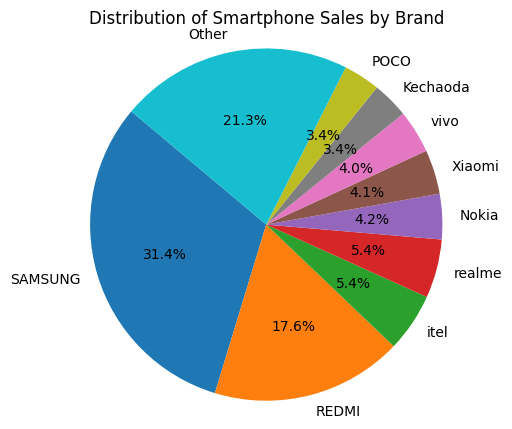

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/mobiledataa/mobile_data.csv')

# Count the number of smartphones sold by each brand
brand_counts = data['Brand'].value_counts()

# Aggregate brands with 1% or less sales into 'Other' category
threshold = 0.03  # 1%
total_sales = brand_counts.sum()
small_brands = brand_counts[brand_counts / total_sales <= threshold]
brand_counts['Other'] = small_brands.sum()
brand_counts.drop(small_brands.index, inplace=True)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smartphone Sales by Brand')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = pd.DataFrame({
  'Phone': ['iPhone 13', 'Samsung Galaxy S22', 'Google Pixel 6 Pro', 'OnePlus 10 Pro', 'Xiaomi 12 Pro', 'Realme GT 2 Pro', 'Motorola Edge 30 Pro', 'Tecno Phantom X', 'Nokia G20', 'Infinix Hot 11S'],
  'Price': ['$1099', '$899', '$890', '$749', '$799', '$499', '$499', '$479', '$179', '$109']
})

# Convert the 'Price' column to numeric (assuming prices are in USD)
data['Price'] = data['Price'].str.replace('[\$,]', '', regex=True).astype(float)

# Sort the DataFrame by 'Price' in descending order (high to low)
data_sorted = data.sort_values(by='Price', ascending=False)

# Select the top 10 smartphones
top_10_smartphones = data_sorted.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_smartphones['Phone'], top_10_smartphones['Price'], color='skyblue')
plt.xlabel('Price (USD)')
plt.ylabel('Phone Model')
plt.title('Top 10 Most Expensive Smartphones (Sample Data)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest price at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the bar graph (without saving to a file)
plt.show()

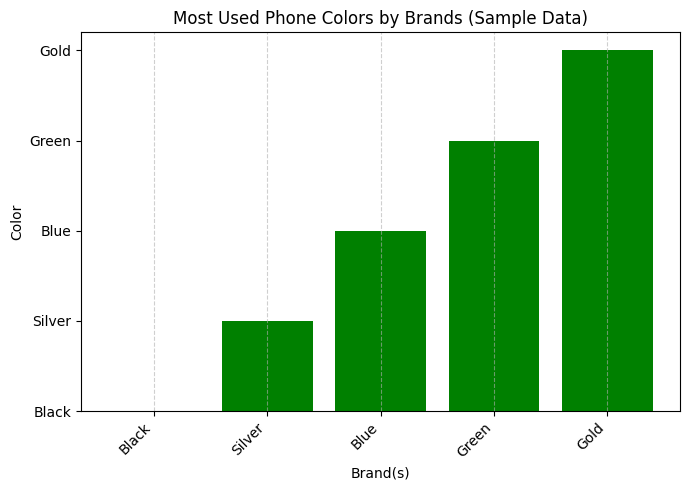

In [2]:
import matplotlib.pyplot as plt

# Sample data (assuming color information is available in a 'Color' column)
colors = ['Black', 'Silver', 'Blue', 'Black', 'Blue', 'Green', 'Silver', 'Gold', 'Blue', 'Black']
brands = ['Apple', 'Samsung', 'Google', 'OnePlus', 'Xiaomi', 'Realme', 'Motorola', 'Tecno', 'Nokia', 'Infinix']

# Count the occurrences of each color for each brand
color_counts = {}
for color, brand in zip(colors, brands):
  if color not in color_counts:
    color_counts[color] = {}
  if brand not in color_counts[color]:
    color_counts[color][brand] = 0
  color_counts[color][brand] += 1

# Find the most used color by each brand
brand_fav_colors = {}
for color, brand_counts in color_counts.items():
  most_used_count = max(brand_counts.values())
  fav_brands = [brand for brand, count in brand_counts.items() if count == most_used_count]
  brand_fav_colors[color] = fav_brands

# Simplify data for plotting (considering only the top 3 brands for each color)
colors_to_plot = []
brands_to_plot = []
for color, fav_brands in brand_fav_colors.items():
  colors_to_plot.append(color)
  brands_to_plot.append(', '.join(fav_brands[:3]))  # Join top 3 brands

# Create a bar chart
plt.figure(figsize=(7, 5))
plt.bar(colors_to_plot, range(len(colors_to_plot)), color='green')  # Use horizontal bars
plt.xlabel('Brand(s)')
plt.ylabel('Color')
plt.title('Most Used Phone Colors by Brands (Sample Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(range(len(colors_to_plot)), colors_to_plot)  # Set color labels on y-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the bar chart (without saving to a file)
plt.show()

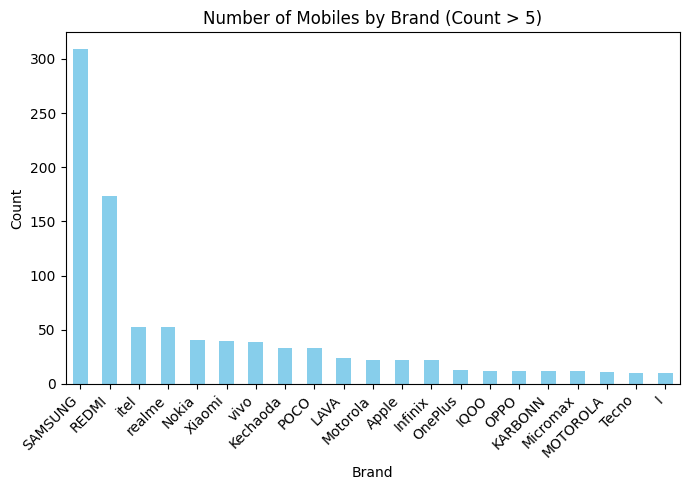

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/mobiledataa/mobile_data.csv')

# Count the number of mobiles for each brand
brand_counts = data['Brand'].value_counts()

# Filter out brand counts less than or equal to 5
brand_counts_filtered = brand_counts[brand_counts > 5]

# Sort the filtered brand counts in descending order
brand_counts_sorted = brand_counts_filtered.sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(7, 5))
brand_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Mobiles by Brand (Count > 5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv('/kaggle/input/reviews/mobile_data_with_reviews_and_ratinl.csv')
data.info()

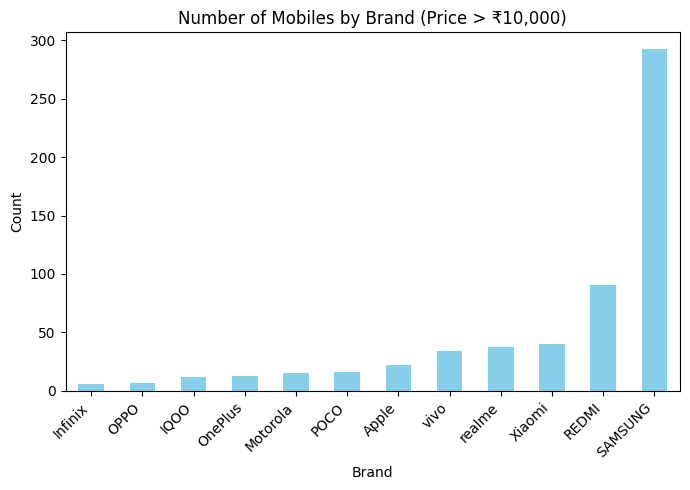

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/mobiledataa/mobile_data.csv')

# Convert the 'Price' column to numeric (removing the currency symbol if present)
data['Price'] = data['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Filter out mobiles with prices above 10000
data_above_10000 = data[data['Price'] > 10000]

# Count the number of mobiles for each brand
brand_counts = data_above_10000['Brand'].value_counts()

# Filter out brand counts less than or equal to 5
brand_counts_filtered = brand_counts[brand_counts > 5]

# Sort the filtered brand counts in descending order
brand_counts_sorted = brand_counts_filtered.sort_values(ascending=True)

# Plotting the bar graph
plt.figure(figsize=(7, 5))
brand_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Mobiles by Brand (Price > ₹10,000)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
